<a href="https://colab.research.google.com/github/SwanandKale/AIML_Bootcamp/blob/main/Tailoring_Crop_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset='/content/drive/MyDrive/ALML DataSets/Crop_recommendation.csv'

import pandas as pd
df=pd.read_csv(dataset)

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
print(df.isna().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df['label']=label_encoder.fit_transform(df['label'])

In [ ]:
df


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


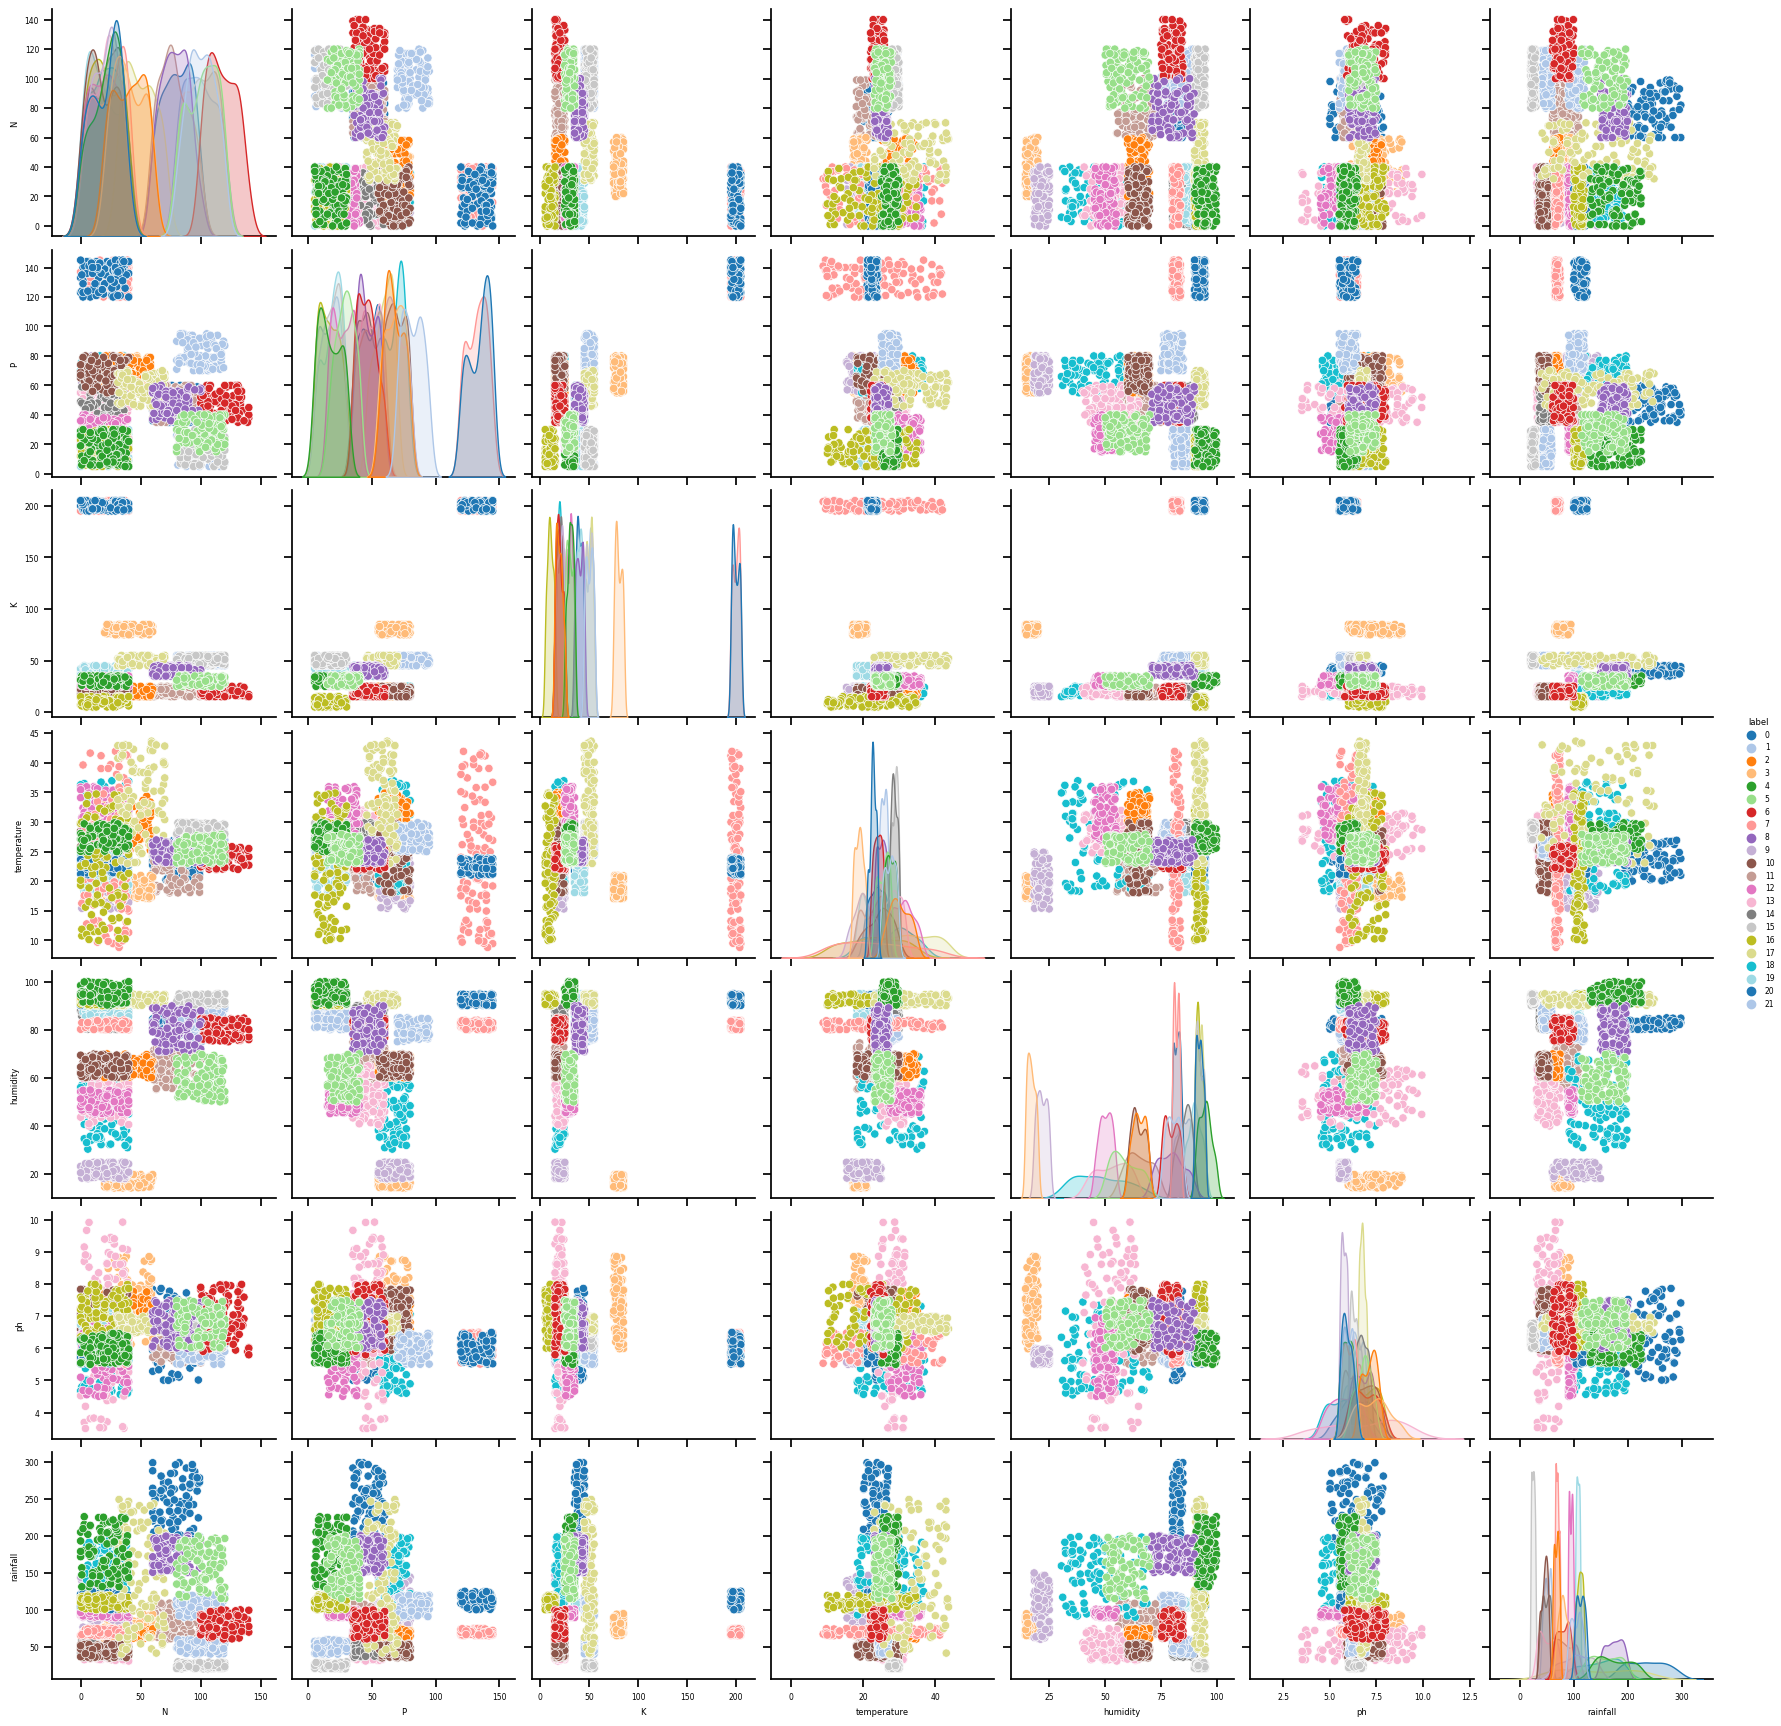

In [ ]:
import seaborn as sns

with sns.plotting_context("notebook",font_scale=0.5):

  sns.pairplot(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']] , hue='label' , palette='tab20')

In [ ]:
original_values = label_encoder.inverse_transform(df['label'])
df['original_label'] = original_values

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,original_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,rice


In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
X=(df.drop('label',axis=1))
X=(X.drop('original_label',axis=1))


In [ ]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
Y=df[['original_label']]

In [ ]:
Y

,original_label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [ ]:
#Splitting up the data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1567,27,120,200,21.452787,90.745319,6.110219,116.703658
2031,81,36,38,23.765547,87.983299,6.334838,150.316615
2073,90,59,35,24.251335,89.864541,7.098228,175.174211
1374,81,16,45,26.904357,86.254262,6.727468,59.759800
279,47,80,77,17.182484,16.428918,7.561108,72.850173
...,...,...,...,...,...,...,...
1033,102,71,48,28.654563,79.286937,5.695268,102.463378
1731,34,68,51,27.347349,94.177567,6.687088,40.351531
763,35,64,15,28.474423,63.536045,6.500145,69.527441
835,39,65,23,25.434598,69.126134,7.685959,41.026829


In [ ]:
Y_train

,original_label
1567,apple
2031,jute
2073,jute
1374,watermelon
279,chickpea
...,...
1033,banana
1731,papaya
763,blackgram
835,lentil


In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 99.31818181818181


In [ ]:
import pandas as pd
new_data=pd.DataFrame(
    {
        'N':[83],
        'P':[45],
        'K':[21],
        'temperature':[18.83344],
        'humidity':[58.75082],
        'ph':[5.716223],
        'rainfall':[79.75329],

    }
)

In [ ]:
new_data

,N,P,K,temperature,humidity,ph,rainfall
0,83,45,21,18.83344,58.75082,5.716223,79.75329


In [ ]:
prediction=classifier.predict(new_data)

In [ ]:
print(prediction[0])

maize
